In [18]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.inspection import permutation_importance

In [26]:
raw_df = pd.read_csv('stats.csv')

In [27]:
df = raw_df.copy()
df.drop('last_name, first_name',axis = 1,inplace=True)
df.drop('player_id',axis = 1,inplace=True)

In [28]:
train_df = df[(df['year'] == 2021) | (df['year'] == 2020)]
val_df = df[df.year==2022]
test_df = df[df.year==2023]

## Linear Regression Training / Validation 
#### all features

In [29]:
####TRAINING
features = ['k_percent','exit_velocity_avg','sweet_spot_percent', 'barrel_batted_rate','solidcontact_percent', 'hard_hit_percent', 
          'avg_best_speed','avg_hyper_speed',
          'whiff_percent', 'swing_percent',
          'groundballs_percent', 'flyballs_percent']

X_train = train_df[features]
y_train = train_df['on_base_plus_slg']

model = linear_model.LinearRegression()
model.fit(X_train, y_train)
b = model.intercept_
w = model.coef_[0]
print(f'TRAINING:::intercept={b:.3}, slope={w:.3}')
print(f'Accuracy on Training Data R^2= {model.score(X_train,y_train):.3}')

TRAINING:::intercept=2.08, slope=-0.00812
Accuracy on Training Data R^2= 0.637


In [30]:
####VALIDATION
X_val = val_df[features]
y_val = val_df['on_base_plus_slg']

validation_predictions = model.predict(X_val)
MAE_val = mean_absolute_error(y_val,validation_predictions)
MSE_val = mean_squared_error(y_val,validation_predictions)
RMSE_val = np.sqrt(MSE_val)

print("MAE_val: %f" % (MAE_val))
print("RMSE_val: %f" % (RMSE_val))

MAE_val: 0.052186
RMSE_val: 0.063538


In [31]:
####TESTING
# X_test = test_df[features]
# y_test = 
# y_hat = model.predict(X_test)


In [32]:
features

['k_percent',
 'exit_velocity_avg',
 'sweet_spot_percent',
 'barrel_batted_rate',
 'solidcontact_percent',
 'hard_hit_percent',
 'avg_best_speed',
 'avg_hyper_speed',
 'whiff_percent',
 'swing_percent',
 'groundballs_percent',
 'flyballs_percent']

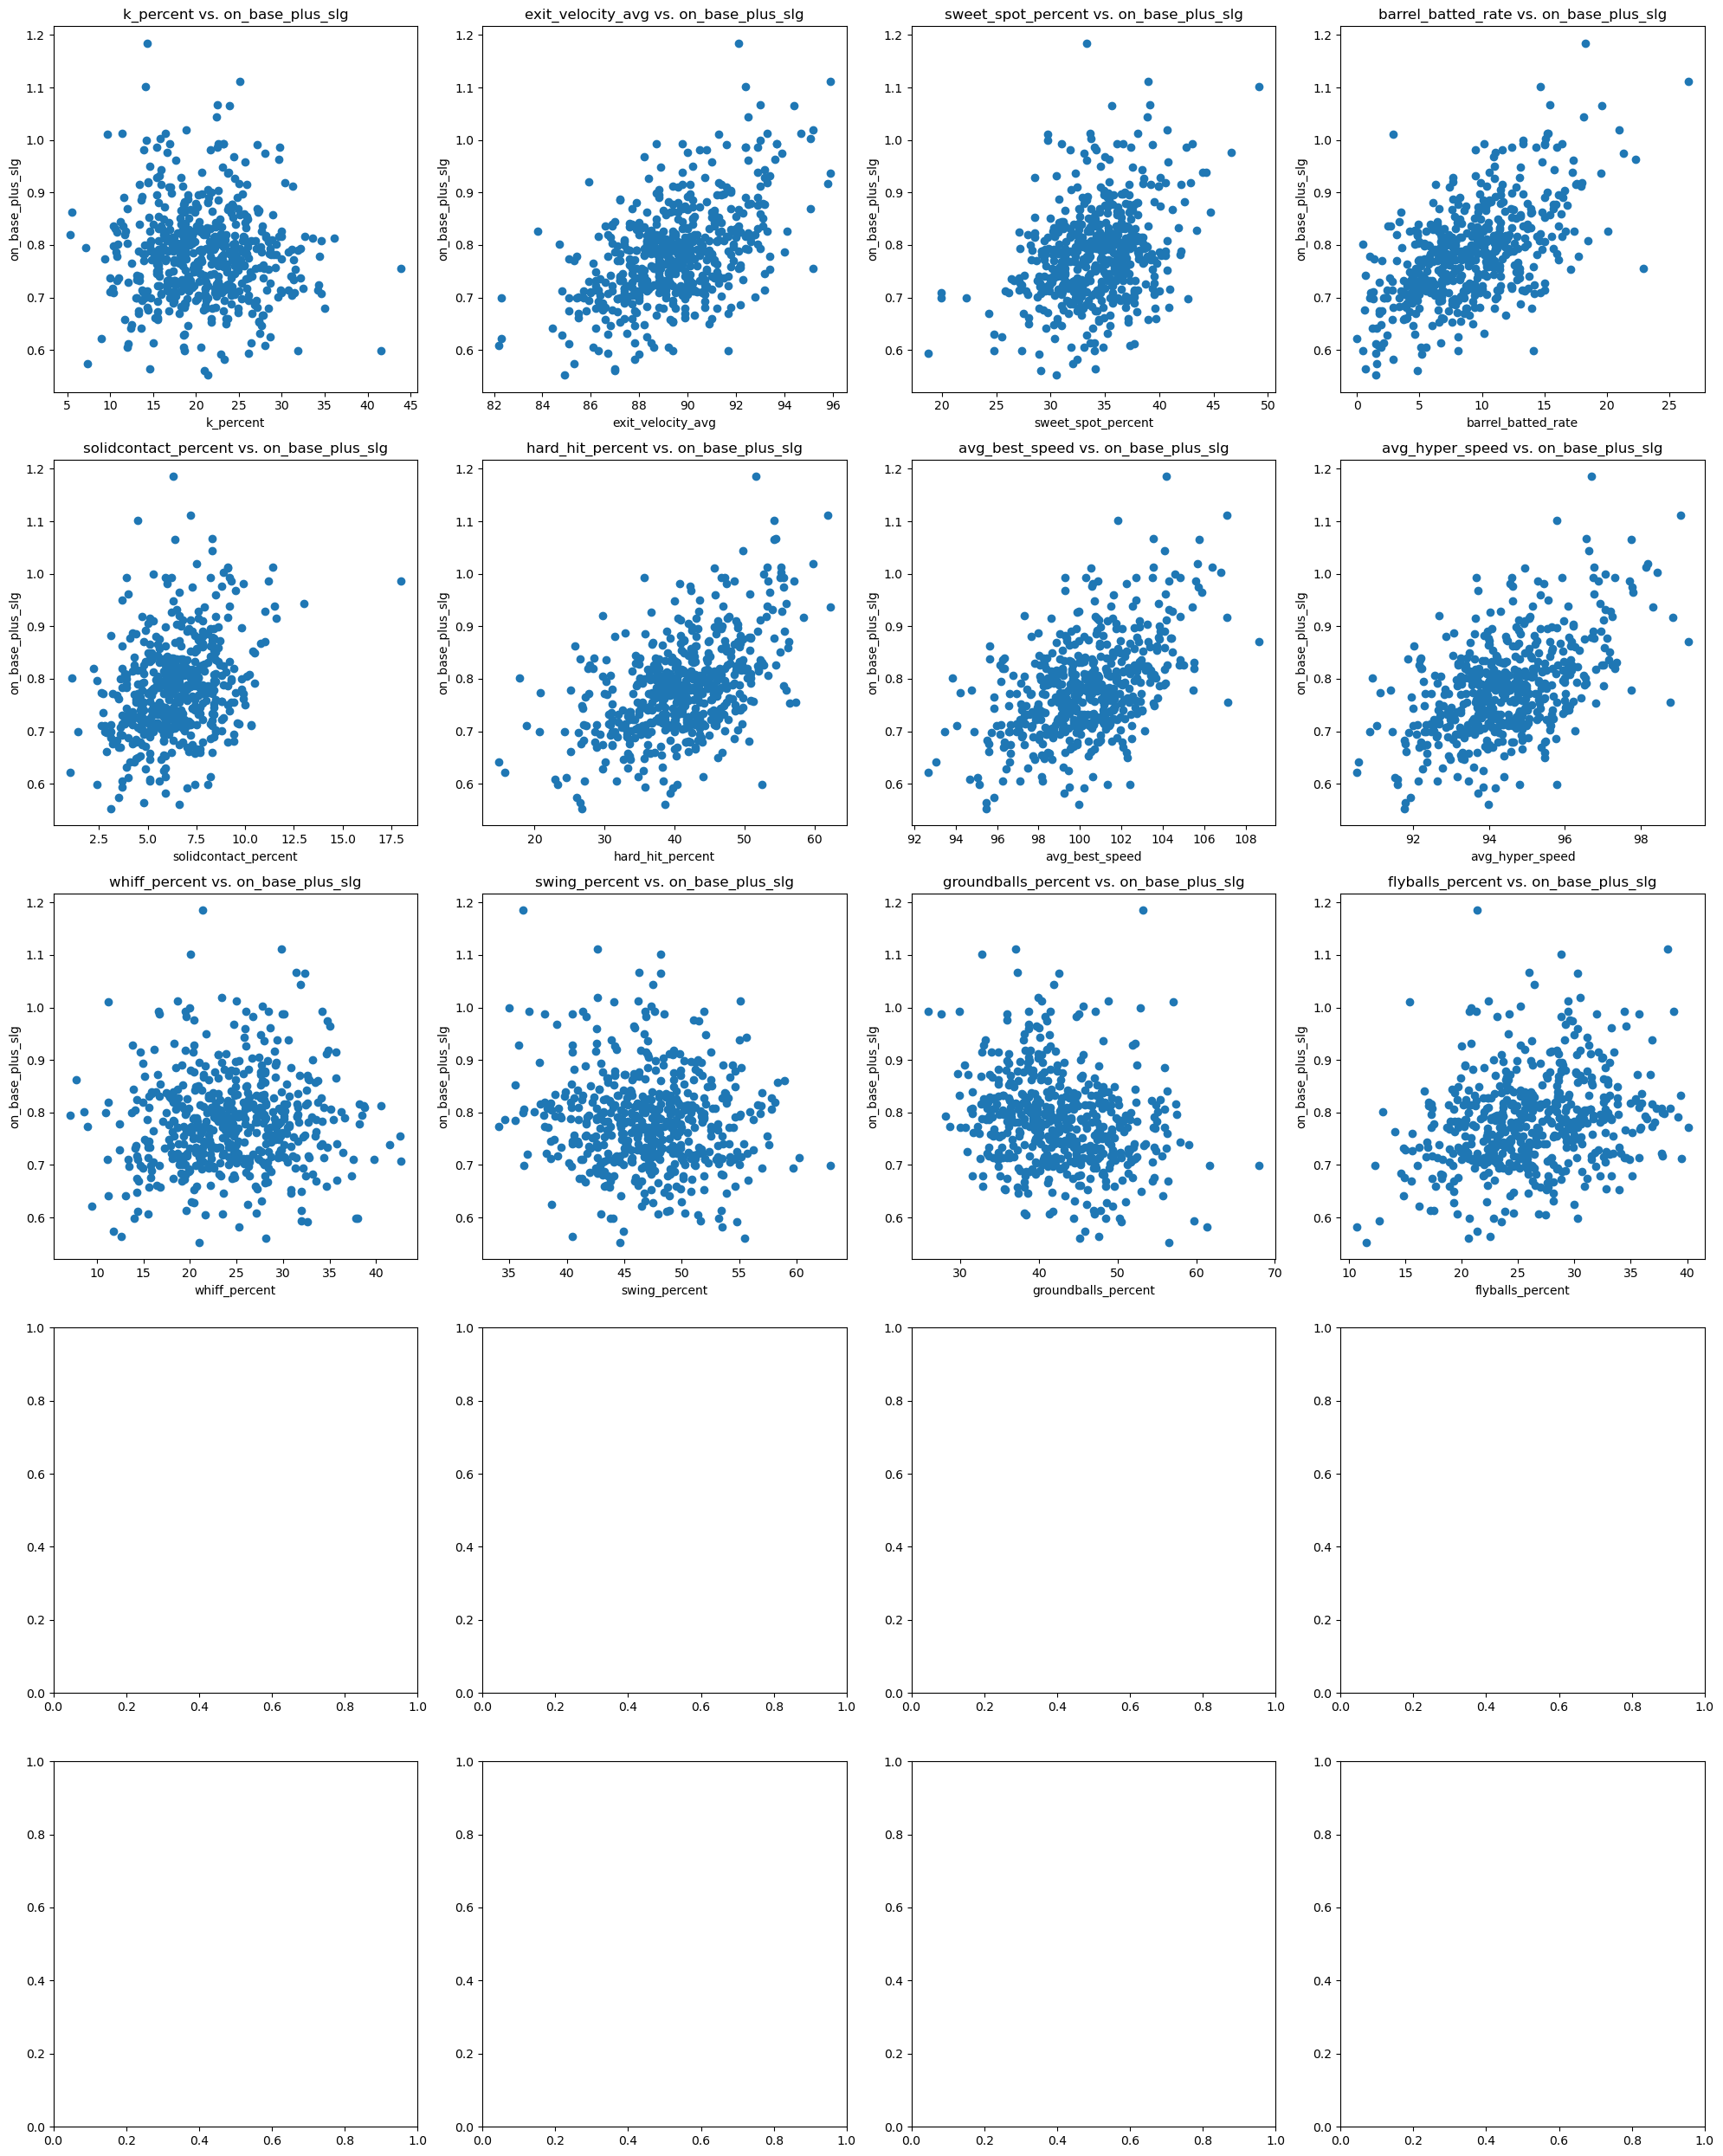

In [33]:
def plot_features_vs_response(df, response, features):
    fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 25))
    axes = axes.flatten()  # Flatten the array of axes
    
    for i, feature in enumerate(features):
        if i < len(axes):  # Check if there are enough axes to plot
            axes[i].scatter(df[feature], df[response])
            axes[i].set_xlabel(feature)
            axes[i].set_ylabel(response)
            axes[i].set_title(f"{feature} vs. {response}")
    
    plt.tight_layout()
    plt.show()
    
plot_features_vs_response(raw_df, "on_base_plus_slg", features)

## PERMUTATION FEATURE IMPORTANCE ON LINEAR REGRESSION MODEL
##### THERE ARE MANY FEATURES AND ALL OF THEM HAVE VERY SMALL WEIGHTS (COEF VALUES) SO I AM GOING TO PERFORM PERMUTATION IMPORTANCE
##### PERMUTATION IMPORTANCE::::evalutates the contributions of each feature to a fitted model 

pi.importances_mean=[ 8.92101028e-01  2.19058256e-01  2.43137437e-02  8.73153966e-01
  3.26048607e-03 -4.36951074e-04  1.82688982e-01  1.40563876e+00
  1.10765476e-02  9.40416832e-03 -8.84653607e-05  1.07400958e-03]
pi.importances_std=[0.0644649  0.03722087 0.01251087 0.13676049 0.00697517 0.0013596
 0.02536638 0.20986081 0.00507362 0.00793397 0.00138556 0.00317549]
pi.importances=[[ 9.40755858e-01  8.71662761e-01  7.74019524e-01  9.39533960e-01
   9.34533038e-01]
 [ 1.71931716e-01  2.39221740e-01  1.77317600e-01  2.63337500e-01
   2.43482724e-01]
 [ 3.15761014e-02  4.04013019e-02  2.08856979e-02  2.57735276e-02
   2.93208946e-03]
 [ 9.68023954e-01  9.56627447e-01  1.01641397e+00  7.63884757e-01
   6.60819708e-01]
 [ 1.08082891e-02  3.35848151e-03  1.05609953e-02 -7.47552796e-03
  -9.49807572e-04]
 [ 4.81956952e-04 -1.31416558e-03  1.80228122e-03 -1.65851223e-03
  -1.49631572e-03]
 [ 1.60469543e-01  2.12388536e-01  1.45611478e-01  1.93695872e-01
   2.01279481e-01]
 [ 1.49747965e+00  1.

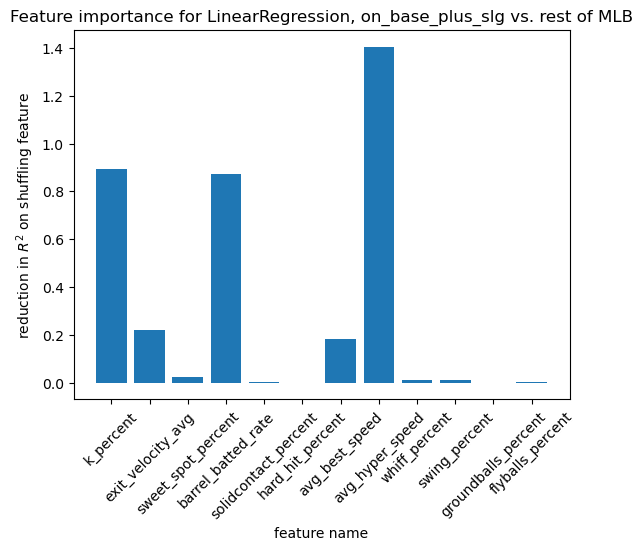

In [34]:

X_feat_importance = val_df[features]
y_feat_importance = val_df['on_base_plus_slg']
model = linear_model.LinearRegression()
model.fit(X_feat_importance, y_feat_importance)
pi = permutation_importance(estimator=model, X=X_feat_importance, y=y_feat_importance, random_state=0)
print(f'pi.importances_mean={pi.importances_mean}')
print(f'pi.importances_std={pi.importances_std}')
print(f'pi.importances={pi.importances}')
plt.bar(x=range(X_feat_importance.columns.size), height=pi.importances_mean, tick_label=X_feat_importance.columns)
plt.title('Feature importance for LinearRegression, on_base_plus_slg vs. rest of MLB')
plt.xlabel('feature name')
plt.xticks(rotation=45)
_ = plt.ylabel(r'reduction in $R^2$ on shuffling feature')

### ANALYZING SUBSETS OF THE MOST IMPORTANT FEATURES


#### 1) features: k_percent, exit_velocity_avg, sweet_spot_percent, barrel_batted_rate, avg_hyper_speed, avg_best_speed

In [37]:
features = ['k_percent','exit_velocity_avg','sweet_spot_percent','barrel_batted_rate','avg_hyper_speed','avg_best_speed']
X_train = train_df[features]
y_train = train_df['on_base_plus_slg']
model = linear_model.LinearRegression()
model.fit(X_train,y_train)
print(f'The accuracy on the training data is = {model.score(X_train,y_train):.3}.')

X_val = val_df[features]
y_val = val_df['on_base_plus_slg']
validation_predictions = model.predict(X_val)
MAE_val = mean_absolute_error(y_val,validation_predictions)
MSE_val = mean_squared_error(y_val,validation_predictions)
RMSE_val = np.sqrt(MSE_val)

print("MAE_val: %f" % (MAE_val))
print("RMSE_val: %f" % (RMSE_val))

The accuracy on the training data is = 0.609.
MAE_val: 0.054388
RMSE_val: 0.065918


## Testing Linear Regression on the 2023 Data


In [78]:
X_test = test_df[features]
y_test = test_df['on_base_plus_slg']

test_predictions = model.predict(X_test)

MAE_test = mean_absolute_error(y_test, test_predictions)
MSE_test = mean_squared_error(y_test, test_predictions)
RMSE_test = np.sqrt(MSE_test)

print("MAE on Test Data:", MAE_test)
print("MSE on Test Data:", MSE_test)
print("RMSE on Test Data:", RMSE_test)

MAE on Test Data: 0.04275323253680784
MSE on Test Data: 0.0028643341592726325
RMSE on Test Data: 0.05351947457956433


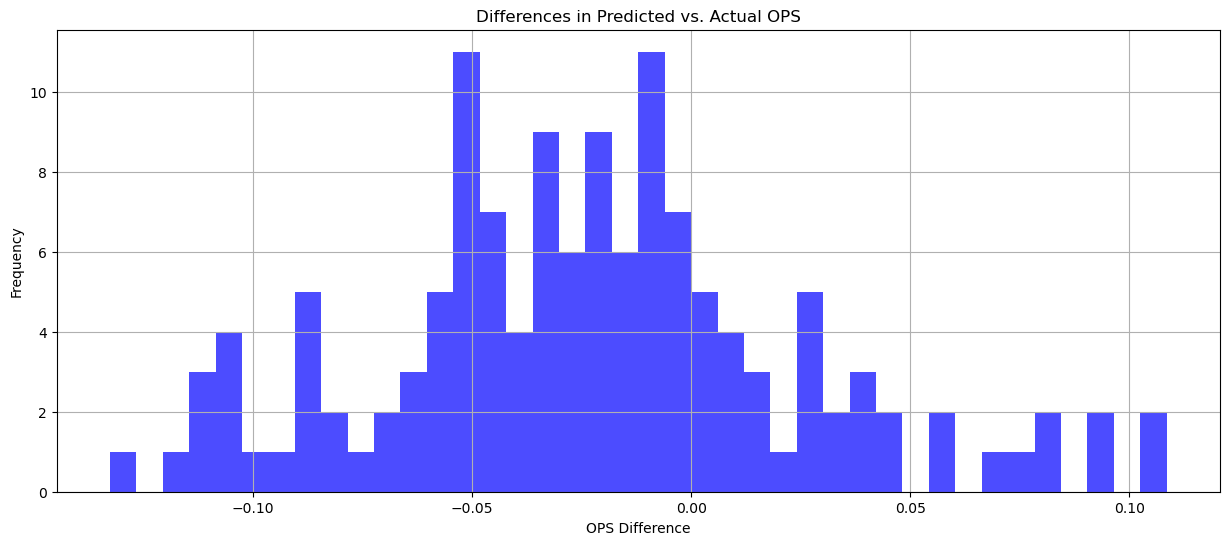

In [90]:
differences = y_test - test_predictions

plt.figure(figsize=(15, 6))
plt.hist(differences, bins=40, alpha=0.7, color='blue')
plt.title('Differences in Predicted vs. Actual OPS')
plt.xlabel('OPS Difference')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

134

## Comparing our linear Regression on Existing 2023 BATX Prediction Model

In [68]:
df = pd.read_csv('stats.csv')
batx_df = pd.read_csv('fangraphs-leaderboard-projections-batX.csv')

def clean_and_rearrange_names(name):
    # Split the name on the comma
    parts = name.split(',')
    # Strip whitespace and rearrange to "First Last"
    if len(parts) == 2:  # Ensure there are two parts, prevent errors
        return parts[1].strip() + ' ' + parts[0].strip()
    else:
        return name

df['Name'] = df['last_name, first_name'].apply(clean_and_rearrange_names)

merged_df = pd.merge(df, batx_df, left_on='Name', right_on='Name', suffixes=('_model', '_batx'))


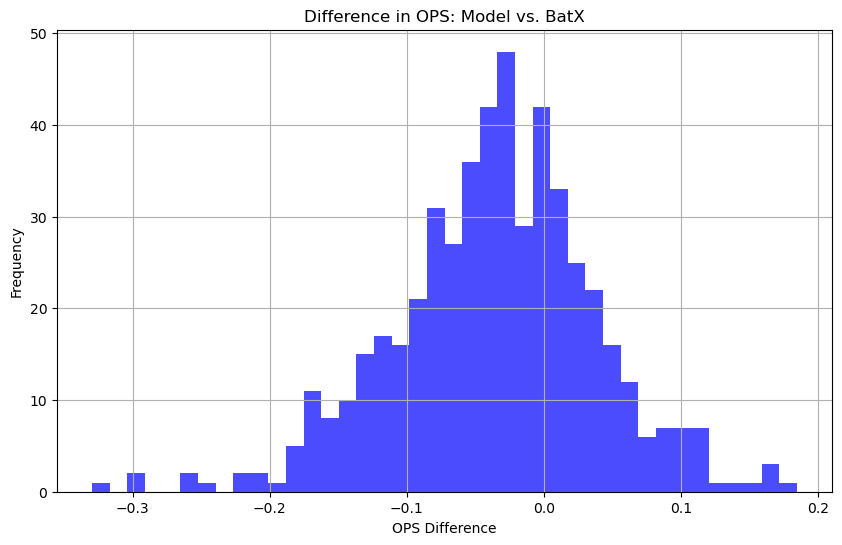

Mean of OPS_Difference: -0.036


In [88]:
merged_df['OPS_Difference'] = merged_df['OPS'] - merged_df['on_base_plus_slg']
                                                          
plt.figure(figsize=(10, 6))
plt.hist(merged_df['OPS_Difference'], bins=40, alpha=0.7, color='blue')
plt.title('Difference in OPS: Model vs. BatX')
plt.xlabel('OPS Difference')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculate and print statistical measures
ops_diff_mean = merged_df['OPS_Difference'].mean()
ops_diff_std = merged_df['OPS_Difference'].std()
mean_ops_difference = merged_df['OPS_Difference'].mean()
print(f"Mean of OPS_Difference: {mean_ops_difference:.3f}")

In [58]:
batx_df.columns

Index(['PlayerId', 'Name', 'OPS'], dtype='object')